1. Clean the data 

In [1]:
'''
Cleaning involves standardizing the date format, stripping whitespace from 
string columns, replacing missing or invalid sales data with the median, 
converting sales to numeric, and dropping duplicate rows 

Note you may have to convert data types (date or numeric) if you want to 
use datetime or statistical operations on a column. Make sure to remove any 
columns from the numeric columns or else it will cause errors.
'''

'\nCleaning involves standardizing the date format, stripping whitespace from \nstring columns, replacing missing or invalid sales data with the median, \nconverting sales to numeric, and dropping duplicate rows \n\nNote you may have to convert data types (date or numeric) if you want to \nuse datetime or statistical operations on a column. Make sure to remove any \ncolumns from the numeric columns or else it will cause errors.\n'

In [33]:
# load the dataframe
import pandas as pd
data = {
    'Date': ['2025-01-05', '01/06/2025', 'Jan 7, 2025', '2025-01-08', '2025-01-08', '2025-01-09'],
    'Region': [' East ', 'West', 'East', 'South', 'South', 'West'],
    'Sales': ['1,200', '950', '', '1,500', '1,500', 'N/A'],
    'Rep': ['Sabria', 'Alex', 'Jordan', 'Taylor', 'Taylor', 'Morgan'],
    'Product': ['Laptop', 'Tablet', 'Laptop', 'Phone', 'Phone', 'Tablet'],
    'Notes': ['Delivered', 'Late delivery', 'Delivered ', 'On time', 'On time', '']
}
df_messy_sales_data = pd.DataFrame(data)

In [34]:
# analyze the data
df_messy_sales_data

,Date,Region,Sales,Rep,Product,Notes
0,2025-01-05,East,"1,200",Sabria,Laptop,Delivered
1,01/06/2025,West,950,Alex,Tablet,Late delivery
2,"Jan 7, 2025",East,,Jordan,Laptop,Delivered
3,2025-01-08,South,"1,500",Taylor,Phone,On time
4,2025-01-08,South,"1,500",Taylor,Phone,On time
5,2025-01-09,West,N/A,Morgan,Tablet,


In [35]:
# leverage dateutil 
from dateutil import parser
df_messy_sales_data['Date'] = df_messy_sales_data['Date'].apply(lambda x: parser.parse(x, fuzzy=True))

In [36]:
# check updated date column
df_messy_sales_data

,Date,Region,Sales,Rep,Product,Notes
0,2025-01-05,East,"1,200",Sabria,Laptop,Delivered
1,2025-01-06,West,950,Alex,Tablet,Late delivery
2,2025-01-07,East,,Jordan,Laptop,Delivered
3,2025-01-08,South,"1,500",Taylor,Phone,On time
4,2025-01-08,South,"1,500",Taylor,Phone,On time
5,2025-01-09,West,N/A,Morgan,Tablet,


In [37]:
# strip whitespace from all string columns 
for col in df_messy_sales_data.columns:
    if df_messy_sales_data[col].dtype == 'object':
        df_messy_sales_data[col] = df_messy_sales_data[col].apply(lambda x: x.strip() if isinstance(x, str) else x)


In [38]:
# check the updated trimmed data 
df_messy_sales_data

,Date,Region,Sales,Rep,Product,Notes
0,2025-01-05,East,"1,200",Sabria,Laptop,Delivered
1,2025-01-06,West,950,Alex,Tablet,Late delivery
2,2025-01-07,East,,Jordan,Laptop,Delivered
3,2025-01-08,South,"1,500",Taylor,Phone,On time
4,2025-01-08,South,"1,500",Taylor,Phone,On time
5,2025-01-09,West,N/A,Morgan,Tablet,


In [39]:
# replace the empty/misformatted values with np.nan
import numpy as np
df_messy_sales_data['Sales'] = df_messy_sales_data['Sales'].replace(['', 'N/A'], np.nan)

In [40]:
df_messy_sales_data

,Date,Region,Sales,Rep,Product,Notes
0,2025-01-05,East,"1,200",Sabria,Laptop,Delivered
1,2025-01-06,West,950,Alex,Tablet,Late delivery
2,2025-01-07,East,NaN,Jordan,Laptop,Delivered
3,2025-01-08,South,"1,500",Taylor,Phone,On time
4,2025-01-08,South,"1,500",Taylor,Phone,On time
5,2025-01-09,West,NaN,Morgan,Tablet,


In [41]:
# drop the comma in the sales column (use str.replace for object data types)
df_messy_sales_data['Sales'] = df_messy_sales_data['Sales'].str.replace(',', '')

In [42]:
# check updates 
df_messy_sales_data

,Date,Region,Sales,Rep,Product,Notes
0,2025-01-05,East,1200,Sabria,Laptop,Delivered
1,2025-01-06,West,950,Alex,Tablet,Late delivery
2,2025-01-07,East,NaN,Jordan,Laptop,Delivered
3,2025-01-08,South,1500,Taylor,Phone,On time
4,2025-01-08,South,1500,Taylor,Phone,On time
5,2025-01-09,West,NaN,Morgan,Tablet,


In [43]:
# now convert to numerics
df_messy_sales_data['Sales'] = pd.to_numeric(df_messy_sales_data['Sales'], errors='coerce')

In [44]:
# check data 
df_messy_sales_data

,Date,Region,Sales,Rep,Product,Notes
0,2025-01-05,East,1200.0,Sabria,Laptop,Delivered
1,2025-01-06,West,950.0,Alex,Tablet,Late delivery
2,2025-01-07,East,NaN,Jordan,Laptop,Delivered
3,2025-01-08,South,1500.0,Taylor,Phone,On time
4,2025-01-08,South,1500.0,Taylor,Phone,On time
5,2025-01-09,West,NaN,Morgan,Tablet,


In [50]:
df_messy_sales_data['Sales'] = df_messy_sales_data['Sales'].fillna(df_messy_sales_data['Sales'].median())

In [51]:
df_messy_sales_data

,Date,Region,Sales,Rep,Product,Notes
0,2025-01-05,East,1200.0,Sabria,Laptop,Delivered
1,2025-01-06,West,950.0,Alex,Tablet,Late delivery
2,2025-01-07,East,1350.0,Jordan,Laptop,Delivered
3,2025-01-08,South,1500.0,Taylor,Phone,On time
4,2025-01-08,South,1500.0,Taylor,Phone,On time
5,2025-01-09,West,1350.0,Morgan,Tablet,


In [52]:
df_messy_sales_data = df_messy_sales_data.drop_duplicates()

In [53]:
# reset the index; use drop = True to remove the old index
df_messy_sales_data.reset_index(drop=True)

,Date,Region,Sales,Rep,Product,Notes
0,2025-01-05,East,1200.0,Sabria,Laptop,Delivered
1,2025-01-06,West,950.0,Alex,Tablet,Late delivery
2,2025-01-07,East,1350.0,Jordan,Laptop,Delivered
3,2025-01-08,South,1500.0,Taylor,Phone,On time
4,2025-01-09,West,1350.0,Morgan,Tablet,


2. Create new columns 

In [18]:
'''
New columns to create include the Month and weekday from date and 
assigning (High, Medium, or Low based on sales range)

Use .dt.month and .dt.day if your date column is in datetime which it should be
'''

'\nNew columns to create include the Month and weekday from date and \nassigning (High, Medium, or Low based on sales range)\n\nUse .dt.month and .dt.day if your date column is in datetime which it should be\n'

In [19]:
# check datatype of the date column 
df_messy_sales_data['Date'].info()

<class 'pandas.core.series.Series'>
Index: 5 entries, 0 to 5
Series name: Date
Non-Null Count  Dtype         
--------------  -----         
5 non-null      datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 80.0 bytes


In [55]:
df_messy_sales_data.loc[:, 'Month'] = df_messy_sales_data['Date'].dt.month_name()

In [56]:
df_messy_sales_data.loc[:, 'Day'] = df_messy_sales_data['Date'].dt.day

C:\Users\Sabria\AppData\Local\Temp\ipykernel_18964\3455199058.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_messy_sales_data.loc[:, 'Day'] = df_messy_sales_data['Date'].dt.day


In [57]:
df_messy_sales_data

,Date,Region,Sales,Rep,Product,Notes,Month,Day
0,2025-01-05,East,1200.0,Sabria,Laptop,Delivered,January,5
1,2025-01-06,West,950.0,Alex,Tablet,Late delivery,January,6
2,2025-01-07,East,1350.0,Jordan,Laptop,Delivered,January,7
3,2025-01-08,South,1500.0,Taylor,Phone,On time,January,8
5,2025-01-09,West,1350.0,Morgan,Tablet,,January,9


In [58]:
# have to use .loc to ensure pandas doesn't have any ambiguity
df_messy_sales_data.loc[:, 'Sales Category'] = df_messy_sales_data['Sales'].apply(lambda x: 'High' if x > 1000 else 'Medium' if 500 < x < 1000 else 'Low')

C:\Users\Sabria\AppData\Local\Temp\ipykernel_18964\2294262993.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_messy_sales_data.loc[:, 'Sales Category'] = df_messy_sales_data['Sales'].apply(lambda x: 'High' if x > 1000 else 'Medium' if 500 < x < 1000 else 'Low')


In [59]:
df_messy_sales_data

,Date,Region,Sales,Rep,Product,Notes,Month,Day,Sales Category
0,2025-01-05,East,1200.0,Sabria,Laptop,Delivered,January,5,High
1,2025-01-06,West,950.0,Alex,Tablet,Late delivery,January,6,Medium
2,2025-01-07,East,1350.0,Jordan,Laptop,Delivered,January,7,High
3,2025-01-08,South,1500.0,Taylor,Phone,On time,January,8,High
5,2025-01-09,West,1350.0,Morgan,Tablet,,January,9,High


3. Group and aggregate

Total Sales by Region and Month

In [60]:
# group total sales by region 
df_messy_sales_data_region = df_messy_sales_data.groupby('Region').agg({'Sales': 'sum'})
df_messy_sales_data_region

,Sales
Region,
East,2550.0
South,1500.0
West,2300.0


In [61]:
# group total sales by month 
df_messy_sales_data_month = df_messy_sales_data.groupby('Month').agg({'Sales': 'sum'})
df_messy_sales_data_month

,Sales
Month,
January,6350.0


Average Sales per Rep

In [ ]:
# average sales per rep (going to be the same as sales because there is no repetiton)
df_messy_sales_data_avg_sales = df_messy_sales_data.groupby('Rep').agg({'Sales': 'mean'})
df_messy_sales_data_avg_sales

,Sales
Rep,
Alex,950.0
Jordan,1350.0
Morgan,1350.0
Sabria,1200.0
Taylor,1500.0


Count of products sold by category 

In [ ]:
# you have to specifiy the count 
df_messy_sales_data_count = df_messy_sales_data.groupby('Product').agg({'Product': 'count'})
df_messy_sales_data_count

,Product
Product,
Laptop,2
Phone,1
Tablet,2


4. Create Visualizations

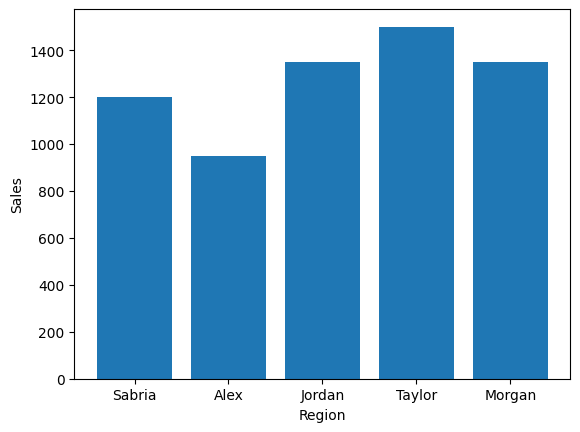

In [ ]:
import matplotlib.pylab as plt 
# create a bar chart to compare monthly sales per rep 
plt.bar(df_messy_sales_data['Rep'], df_messy_sales_data['Sales'])
plt.xlabel('Region')
plt.ylabel('Sales')
plt.show()